<a href="https://colab.research.google.com/github/Tejas-TA/Machine-Learning-Prediction-of-California-House-Prices/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> ## **California Housing Prices Prediction - Machine Learning**



### Exploratory Data Analysis (EDA)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Using pandas for Data Analysis and Data Manipulation
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/housing.csv")

In [3]:
#Examining first 10 values of all features
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [4]:
#Examining last 10 values of all features
df.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20630,-121.32,39.29,11,2640,505.0,1257,445,3.5673,INLAND,112000
20631,-121.40,39.33,15,2655,493.0,1200,432,3.5179,INLAND,107200
20632,-121.45,39.26,15,2319,416.0,1047,385,3.1250,INLAND,115600
20633,-121.53,39.19,27,2080,412.0,1082,382,2.5495,INLAND,98300
20634,-121.56,39.27,28,2332,395.0,1041,344,3.7125,INLAND,116800
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [5]:
#Checking number of rows and columns (m*n)
df.shape

(20640, 10)

In [6]:
#Feature names listed
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
#25%, 75%, standard deviaiton etc are displayed for all features
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
#To check non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
#Using matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

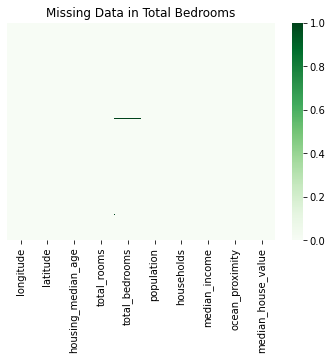

In [10]:
#Visualizing missing data
sns.heatmap(df.isnull(),cmap='Greens',cbar=True,yticklabels=False)
plt.title('Missing Data in Total Bedrooms')
plt.show()

In [11]:
#Checking as to which feature has missing values using boolean commands
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [12]:
#So, total_bedrooms has missing values
#Counting how many rows do not have bedrooms 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

<b>We have 207 missing values for 'total_bedrooms' which will be handled during the next phase

### Data Cleaning, Visualization, Feature Engineering and Selection

In [13]:
#Another version of df.head() but without feature names
df.values

array([[-122.23, 37.88, 41, ..., 8.3252, 'NEAR BAY', 452600],
       [-122.22, 37.86, 21, ..., 8.3014, 'NEAR BAY', 358500],
       [-122.24, 37.85, 52, ..., 7.2574, 'NEAR BAY', 352100],
       ...,
       [-121.22, 39.43, 17, ..., 1.7, 'INLAND', 92300],
       [-121.32, 39.43, 18, ..., 1.8672, 'INLAND', 84700],
       [-121.24, 39.37, 16, ..., 2.3886, 'INLAND', 89400]], dtype=object)

In [14]:
# Shuffling all rows(frac=1)
df = df.sample(frac=1)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1726,-122.37,37.95,32,1298,363.0,716,268,0.9797,NEAR BAY,76400
12942,-121.27,38.65,25,2787,601.0,1247,522,2.9016,INLAND,159800
15016,-117.03,32.77,19,4819,1492.0,2572,1336,2.3393,<1H OCEAN,118200
14577,-117.20,32.82,35,1217,220.0,643,237,3.9464,NEAR OCEAN,171600
6477,-118.08,34.09,32,3214,718.0,2316,751,3.7066,<1H OCEAN,206800
18096,-122.04,37.33,26,2690,401.0,1264,429,7.7643,<1H OCEAN,474700
8043,-118.16,33.84,36,2831,573.0,1462,569,3.8646,<1H OCEAN,214600
15068,-116.97,32.78,37,1255,238.0,671,278,3.7019,<1H OCEAN,138600
19603,-121.04,37.60,27,958,184.0,580,177,2.1875,INLAND,82800
13468,-117.38,34.09,8,3955,815.0,2184,725,3.3438,INLAND,127600


In [15]:
#Categorical Data, so, will enumerate and replace all data with unique values for each type of data
df['ocean_proximity'].unique()

array(['NEAR BAY', 'INLAND', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

[]

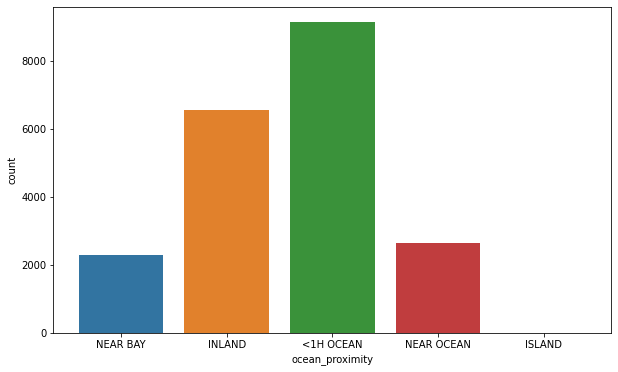

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

In [17]:
# Replace ocean proximity with values to help our model
ocean_proximity = {a:b for b,a in enumerate(df['ocean_proximity'].unique())}
df.replace(ocean_proximity, inplace=True)

In [18]:
df.ocean_proximity.unique()

array([0, 1, 2, 3, 4])

In [19]:
# The feature 'total_bedrooms' has NaN values so I will replace them with the mean of the feature
df = df.apply(lambda x: x.fillna(x.mean()))

In [20]:
#Run this cell to check if mean values are populated into the csv. 
#Note that data frame has been shuffled
#new=df.to_csv("total_bedrooms".csv")

In [21]:
#Verifying Data is balanced
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

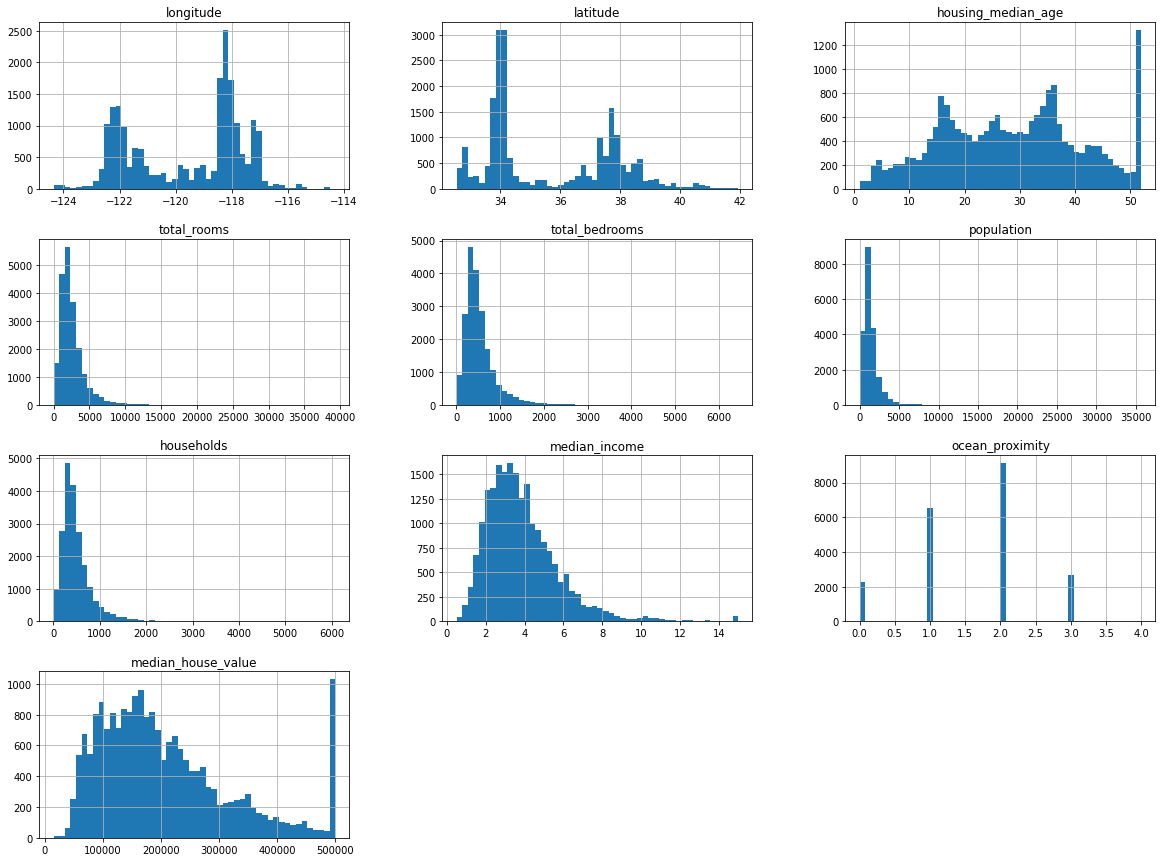

In [22]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

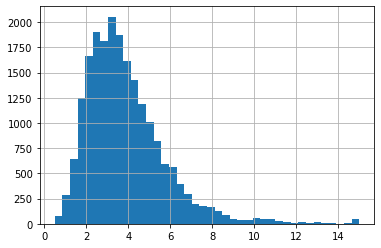

In [23]:
#Analyzing the median income range
df["median_income"].hist(bins=40)

In [24]:
# Calculating correlation
corr_matrix=df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,0.399266,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.521292,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,-0.049827,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,-0.000911,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.018246,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,0.046390,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.029373,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.098940,0.688075
ocean_proximity,0.399266,-0.521292,-0.049827,-0.000911,0.018246,0.046390,0.029373,0.098940,1.000000,0.203778
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,0.203778,1.000000


<Figure size 720x432 with 0 Axes>

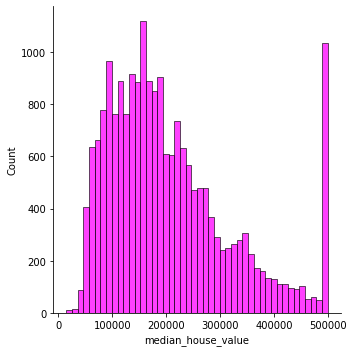

In [25]:
plt.figure(figsize=(10,6))
sns.displot(df['median_house_value'],color='magenta')
plt.show()

As we see from above data, house values > 500000 are outliers, so we remove them

In [26]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()

500001    965
500000     27
475000      8
483300      6
466700      4
Name: median_house_value, dtype: int64

In [27]:
df=df.loc[df['median_house_value']<500001,:]

In [28]:
df=df[df['population']<25000]

<Figure size 1008x576 with 0 Axes>

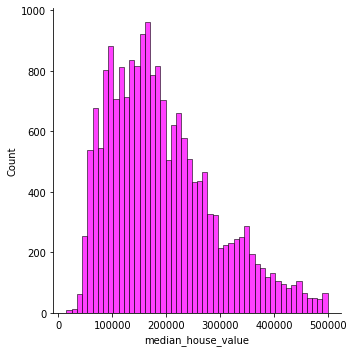

In [29]:
plt.figure(figsize=(14,8))
sns.displot(df['median_house_value'],color='magenta')
plt.show()

<b>The outliers of median house value >500000 are removed

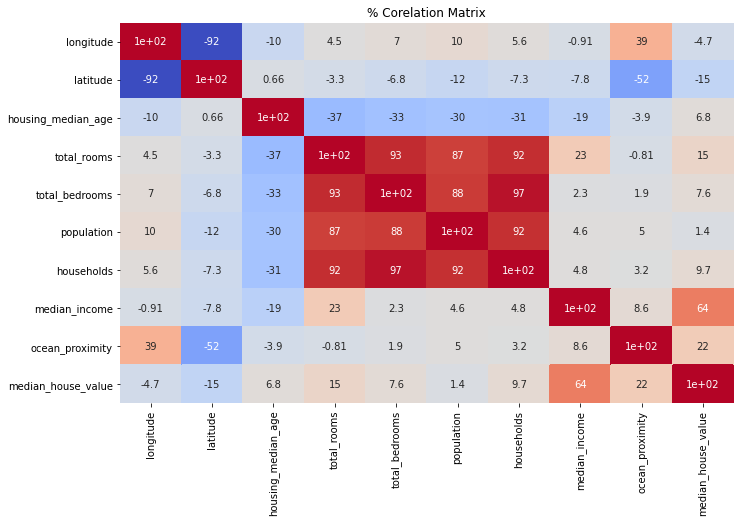

In [30]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

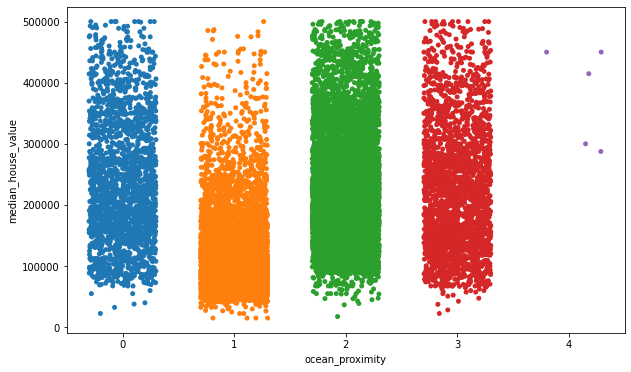

In [31]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.3)

[]

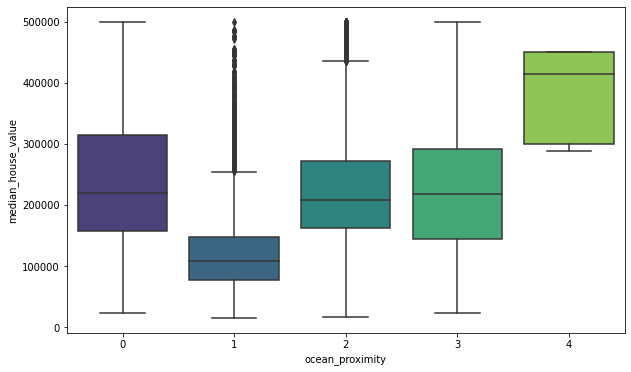

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

### Modelling and Evaluation

In [33]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [34]:
X.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1726,-122.37,37.95,32,1298,363.0,716,268,0.9797,0
12942,-121.27,38.65,25,2787,601.0,1247,522,2.9016,1
15016,-117.03,32.77,19,4819,1492.0,2572,1336,2.3393,2
14577,-117.20,32.82,35,1217,220.0,643,237,3.9464,3
6477,-118.08,34.09,32,3214,718.0,2316,751,3.7066,2
18096,-122.04,37.33,26,2690,401.0,1264,429,7.7643,2
8043,-118.16,33.84,36,2831,573.0,1462,569,3.8646,2
15068,-116.97,32.78,37,1255,238.0,671,278,3.7019,2
19603,-121.04,37.60,27,958,184.0,580,177,2.1875,1
13468,-117.38,34.09,8,3955,815.0,2184,725,3.3438,1


In [35]:
X.shape

(19673, 9)

In [36]:
y.head(10)

1726      76400
12942    159800
15016    118200
14577    171600
6477     206800
18096    474700
8043     214600
15068    138600
19603     82800
13468    127600
Name: median_house_value, dtype: int64

In [37]:
y.shape

(19673,)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [39]:
print("X_train shape is ",X_train.shape)
print("X_test shape is ",X_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

X_train shape is  (11803, 9)
X_test shape is  (7870, 9)
y_train shape is  (11803,)
y_test shape is  (7870,)


### 1. Random Forest Regressor

In [40]:
#Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracies = {}

accuracy = rf.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Random Forest'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rf.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rf.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rf.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Random Forest Regressor is ", accuracy_rounded,'%')


R2 score is  0.7832358051464153

Adjusted R2 score is  0.7522694915959032

Mean Absolute Error is 30721.65

Mean Squared Error is 2092687538.84

Root Mean Squared Error is 45745.9

Accuracy of Random Forest Regressor is  78.32 %


### 2. Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Decision Tree'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,dt.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,dt.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(metrics.mean_squared_error(y_test,dt.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Decision Tree Regressor is ", accuracy_rounded,'%')


R2 score is  0.5566886018214638

Adjusted R2 score is  0.4933584020816729

Mean Absolute Error is 43319.38

Mean Squared Error is 4279822317.61

Root Mean Squared Error is 65420.35

Accuracy of Decision Tree Regressor is  55.67 %


### 3. AdaBoost Regressor

In [43]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=0)

ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

accuracy = ada.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['AdaBoost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,ada.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,ada.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,ada.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of AdaBoost Regressor is ", accuracy_rounded,'%')


R2 score is  0.3626153065393227

Adjusted R2 score is  0.2715603503306545

Mean Absolute Error is 67663.64

Mean Squared Error is 6153447096.52

Root Mean Squared Error is 78443.91

Accuracy of AdaBoost Regressor is  36.26 %


### 4. XGBoost Regressor

In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

xg = XGBRegressor()
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)

accuracy = xg.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['XGBoost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,xg.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,xg.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,xg.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of XGBoost Regressor is ", accuracy_rounded,'%')

[12:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

R2 score is  0.7394561294472903

Adjusted R2 score is  0.702235576511189

Mean Absolute Error is 35371.47

Mean Squared Error is 2515345818.97

Root Mean Squared Error is 50153.22

Accuracy of XGBoost Regressor is  73.95 %


### 5. Gradient Boost Regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gboost = GradientBoostingRegressor(random_state=42)

gboost.fit(X_train,y_train)

y_pred = gboost.predict(X_test)

accuracy = gboost.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Gradient Boost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,gboost.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,gboost.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,gboost.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Gradient Boost Regressor is ", accuracy_rounded,'%')


R2 score is  0.7332654000851206

Adjusted R2 score is  0.6951604572401379

Mean Absolute Error is 35823.29

Mean Squared Error is 2575112434.03

Root Mean Squared Error is 50745.57

Accuracy of Gradient Boost Regressor is  73.33 %


### 6. Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.1)

rid.fit(X_train,y_train)

y_pred = rid.predict(X_test)

accuracy = rid.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Ridge Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rid.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rid.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rid.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Ridge Regression is ", accuracy_rounded,'%')


R2 score is  0.6008881616883058

Adjusted R2 score is  0.5438721847866352

Mean Absolute Error is 45897.34

Mean Squared Error is 3853110386.62

Root Mean Squared Error is 62073.43

Accuracy of Ridge Regression is  60.09 %


### 7. Lasso Regression

In [47]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.3)

lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

accuracy = lasso.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Lasso Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,lasso.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,lasso.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,lasso.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Lasso Regression is ", accuracy_rounded,'%')


R2 score is  0.6008881496276757

Adjusted R2 score is  0.5438721710030578

Mean Absolute Error is 45897.34

Mean Squared Error is 3853110503.06

Root Mean Squared Error is 62073.43

Accuracy of Lasso Regression is  60.09 %


### 8. ElasticNet Regression

In [48]:
from sklearn.linear_model import ElasticNet

ela = ElasticNet(random_state=0)

ela.fit(X_train,y_train)

y_pred = ela.predict(X_test)

accuracy = ela.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Elastic Net Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,ela.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,ela.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,ela.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Elastic net Regression is ", accuracy_rounded,'%')


R2 score is  0.5564862201303187

Adjusted R2 score is  0.49312710872036425

Mean Absolute Error is 49133.97

Mean Squared Error is 4281776153.41

Root Mean Squared Error is 65435.28

Accuracy of Elastic net Regression is  55.65 %


### 9. CatBoost

In [49]:
!pip install catboost

In [50]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()

cat.fit(X_train,y_train)

y_pred = cat.predict(X_test)

accuracy = cat.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['CatBoost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,cat.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,cat.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,cat.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of CatBoost is ", accuracy_rounded,'%')

Learning rate set to 0.060564
0:	learn: 94285.9830965	total: 52.4ms	remaining: 52.4s
1:	learn: 91479.7819209	total: 56.7ms	remaining: 28.3s
2:	learn: 88823.0932813	total: 60.8ms	remaining: 20.2s
3:	learn: 86475.8899997	total: 64.9ms	remaining: 16.2s
4:	learn: 84105.1713553	total: 68.8ms	remaining: 13.7s
5:	learn: 82092.3871447	total: 73ms	remaining: 12.1s
6:	learn: 80202.9309175	total: 77.2ms	remaining: 11s
7:	learn: 78416.0832225	total: 81.5ms	remaining: 10.1s
8:	learn: 76833.7024186	total: 86ms	remaining: 9.47s
9:	learn: 75371.4146974	total: 90.3ms	remaining: 8.94s
10:	learn: 74062.6068044	total: 94.6ms	remaining: 8.51s
11:	learn: 72866.7285875	total: 98.8ms	remaining: 8.13s
12:	learn: 71701.3025841	total: 103ms	remaining: 7.83s
13:	learn: 70569.8590842	total: 107ms	remaining: 7.55s
14:	learn: 69583.4416128	total: 112ms	remaining: 7.33s
15:	learn: 68675.1980384	total: 116ms	remaining: 7.11s
16:	learn: 67873.2201456	total: 120ms	remaining: 6.93s
17:	learn: 67007.7841017	total: 124ms	r

### 10. Light GBM

In [51]:
!pip install lightgbm

In [52]:
import lightgbm as lgb

lg = lgb.LGBMRegressor()

lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)

accuracy = lg.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Light GBM'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,lg.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,lg.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,lg.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Light GBM is ", accuracy_rounded,'%')


R2 score is  0.7957184078382149

Adjusted R2 score is  0.7665353232436742

Mean Absolute Error is 30362.45

Mean Squared Error is 1972177843.39

Root Mean Squared Error is 44409.21

Accuracy of Light GBM is  79.57 %


In [53]:
#Verifying how untuned models predict house value
print('\nPrediction of Random Forest is ',rf.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))      
print('\nPrediction of Ada Boost is ',ada.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]])) 
print('\nPrediction of Gradient Boost is ',gboost.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Ridge Regression is ',rid.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Lasso Regression is ',lasso.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Elasticnet Regression is ',ela.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Decision Tree is ',dt.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of CatBoost is ',cat.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Light GBM is ',lg.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))


Prediction of Random Forest is  [415482.]

Prediction of Ada Boost is  [335364.57564576]

Prediction of Gradient Boost is  [408704.15479083]

Prediction of Ridge Regression is  [401869.56241675]

Prediction of Lasso Regression is  [401870.22914012]

Prediction of Elasticnet Regression is  [376429.54743047]

Prediction of Decision Tree is  [361600.]

Prediction of CatBoost is  [451460.49067526]

Prediction of Light GBM is  [432786.20765921]


### All accuracies together

In [54]:
accuracies

{'AdaBoost': 36.26,
 'CatBoost': 81.36,
 'Decision Tree': 55.67,
 'Elastic Net Regression': 55.65,
 'Gradient Boost': 73.33,
 'Lasso Regression': 60.09,
 'Light GBM': 79.57,
 'Random Forest': 78.32,
 'Ridge Regression': 60.09,
 'XGBoost': 73.95}

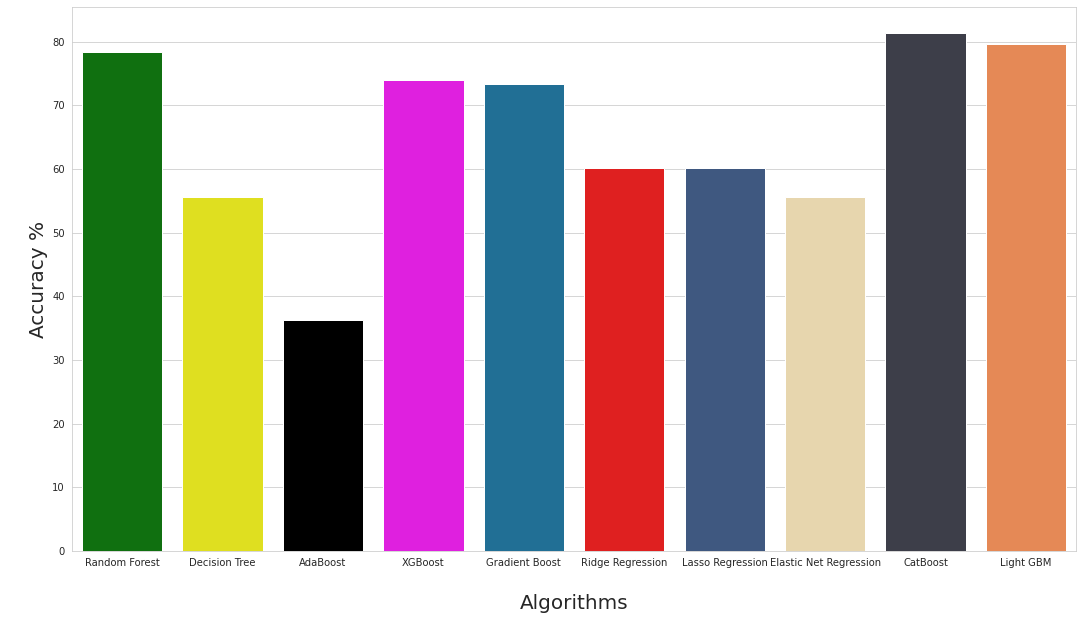

In [55]:
#Plotting accuracies of all the models
colors = ["green", "yellow", "black", "magenta", "#0e76a8", "red", "#34558b","#f0daa4","#3b3d4b","#fd823e"]

sns.set_style("whitegrid")
plt.figure(figsize=(18,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("\nAccuracy %",fontsize=20)
plt.xlabel("\nAlgorithms",fontsize=20)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [56]:
#CatBoost performs the best without tuning.

### Hyperparameter Tuning


> Let's try to increase the accuracy of the top performing models on this dataset - 

> 1.   RandomForest
2.   CatBoost
1.   LightGBM

---



In [57]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

### Random Forest Tuning

In [58]:
#Randomized Search CV

# Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 300, num = 6)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 13, 16]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


print(random_grid)

{'n_estimators': [5, 64, 123, 182, 241, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, None], 'min_samples_split': [2, 5, 10, 13, 16], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [59]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 9, 
                               cv = 4, 
                               verbose=0,
                               random_state=42, 
                               n_jobs = -1)

In [60]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [61]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 64}

In [62]:
#Predict on test data
y_pred = rf_random.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rf_random.predict(X_test))),2))


R2 score is  0.79

Adjusted R2 score is  0.76

Mean Absolute Error is 30619.87

Mean Squared Error is 2066902252.04

Root Mean Squared Error is 45463.2


In [63]:
#Grid Search CV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 8, 10],
    'n_estimators': [100, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 0)

grid_search.fit(X_train,y_train)

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 300}

In [64]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [65]:
#Predict on test data
y_pred = best_grid.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rf_random.predict(X_test))),2))


R2 score is  0.78

Adjusted R2 score is  0.75

Mean Absolute Error is 30619.87

Mean Squared Error is 2066902252.04

Root Mean Squared Error is 45463.2


### CatBoost Tuning

In [66]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 150, num = 2)]

max_depth = [int(x) for x in np.linspace(2, 120, num = 2)] 

max_depth.append(None)

grid = {'n_estimators': n_estimators, 'learning_rate' : np.linspace(0,0.3,5)}

print(grid)

{'n_estimators': [5, 150], 'learning_rate': array([0.   , 0.075, 0.15 , 0.225, 0.3  ])}


In [67]:
rscv = RandomizedSearchCV(      estimator=cat, 
                                param_distributions=grid, 
                                n_iter = 10, 
                                scoring='r2',
                                cv = 5, 
                                verbose=0, 
                                random_state=42,
                                n_jobs=-1,
                                return_train_score=True)

rscv.fit(X_train, y_train)

0:	learn: 83283.5528463	total: 5.46ms	remaining: 814ms
1:	learn: 74815.2702128	total: 9.71ms	remaining: 719ms
2:	learn: 68786.9245066	total: 13.9ms	remaining: 683ms
3:	learn: 64809.0868478	total: 18.2ms	remaining: 663ms
4:	learn: 62047.3669251	total: 22.3ms	remaining: 647ms
5:	learn: 60227.0572188	total: 26.3ms	remaining: 631ms
6:	learn: 58903.8437870	total: 31.3ms	remaining: 640ms
7:	learn: 57937.7155324	total: 35.5ms	remaining: 631ms
8:	learn: 56655.2076679	total: 40ms	remaining: 626ms
9:	learn: 55807.8175606	total: 44.6ms	remaining: 625ms
10:	learn: 55255.1167639	total: 48.9ms	remaining: 617ms
11:	learn: 54120.7773063	total: 53.1ms	remaining: 611ms
12:	learn: 53778.2217370	total: 57.4ms	remaining: 605ms
13:	learn: 53332.3107373	total: 61.5ms	remaining: 597ms
14:	learn: 52412.3358508	total: 65.5ms	remaining: 590ms
15:	learn: 51989.3916508	total: 69.7ms	remaining: 584ms
16:	learn: 51685.0071333	total: 74.2ms	remaining: 581ms
17:	learn: 51350.5457254	total: 78.4ms	remaining: 575ms
18:	

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7fcc9e668950>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.   , 0.075, 0.15 , 0.225, 0.3  ]),
                                        'n_estimators': [5, 150]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='r2', verbose=0)

In [68]:
# summarize result
print(rscv.best_params_)
print(rscv.score(X_test , y_test))

{'n_estimators': 150, 'learning_rate': 0.3}
0.7998492587728515


In [69]:
#Predict on test data
y_pred = rscv.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rscv.predict(X_test))),2))


R2 score is  0.8

Adjusted R2 score is  0.77

Mean Absolute Error is 30108.2

Mean Squared Error is 1932297731.82

Root Mean Squared Error is 43957.91


### Light GBM Tuning

In [70]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 350, num = 2)]

max_depth = [int(x) for x in np.linspace(3, 450, num = 3)] 

max_depth.append(None)

grid = {'n_estimators': n_estimators,'learning_rate' : np.linspace(0,0.5,5)}

print(grid)

{'n_estimators': [5, 350], 'learning_rate': array([0.   , 0.125, 0.25 , 0.375, 0.5  ])}


In [71]:
rscv = RandomizedSearchCV(      estimator=lg, 
                                param_distributions=grid, 
                                n_iter = 15, 
                                scoring='r2',
                                cv = 10, 
                                verbose=0, 
                                random_state=42,
                                n_jobs=-1,
                                return_train_score=True)

rscv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=15. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=True, subsample=1.0,
                                           subsample_for_bin=200000,
                                           subs

In [72]:
# summarize result
print(rscv.best_params_)
print(rscv.score(X_test , y_test))

{'n_estimators': 350, 'learning_rate': 0.125}
0.8066438082211866


In [73]:
#Predict on test data
y_pred = rscv.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rscv.predict(X_test))),2))


R2 score is  0.81

Adjusted R2 score is  0.78

Mean Absolute Error is 28981.8

Mean Squared Error is 1866701709.51

Root Mean Squared Error is 43205.34


### Exporting the Model



> Based on hyperparameter tuning, we can either choose Catboost or LightGBM(top-performer)



In [74]:
#Exporting the model using joblib library
import joblib
joblib.dump(lg,"California_Model.pkl")

['California_Model.pkl']